In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress = True)
pd.set_option('display.float_format', lambda x: '%.4f' %x)

In [85]:
datDir = os.path.join(os.path.dirname(os.getcwd()),'dat')

In [86]:
os.listdir(datDir)

['creditcard.csv']

In [87]:
DF = pd.read_csv(datDir + '/creditcard.csv')
DF.drop('Time', axis = 1, inplace = True)
DF['Class'] = DF['Class'].astype('category')
print(DF.shape)
DF.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


## 1. EDA
### 1.1 Data Type

총 변수가 30 개이며, 29개의 변수는 float 형이며, 1개 변수는 category 형이다.

In [88]:
DF.dtypes

V1         float64
V2         float64
V3         float64
V4         float64
V5         float64
V6         float64
V7         float64
V8         float64
V9         float64
V10        float64
V11        float64
V12        float64
V13        float64
V14        float64
V15        float64
V16        float64
V17        float64
V18        float64
V19        float64
V20        float64
V21        float64
V22        float64
V23        float64
V24        float64
V25        float64
V26        float64
V27        float64
V28        float64
Amount     float64
Class     category
dtype: object

### 1.2 Descriptive Statistic

In [89]:
DF['Class'].value_counts()/DF.shape[0]

0   0.9983
1   0.0017
Name: Class, dtype: float64

정상 거래가 99.82 % 가 있고 사기가 0.18 % 가 있다. 

In [90]:
DF.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496
std,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,...,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201
min,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,...,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000
25%,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,...,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000
50%,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,...,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000
75%,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,...,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650
max,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,...,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600


In [93]:
scaler = StandardScaler()
scaler.fit(DF)

StandardScaler()

In [101]:
standardNP = scaler.transform(DF)
standardDF = pd.DataFrame(standardNP, columns = DF.columns.tolist())

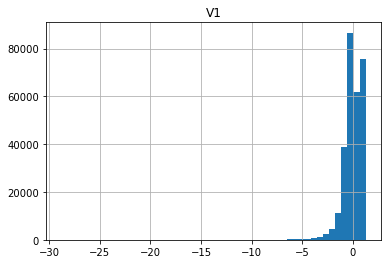

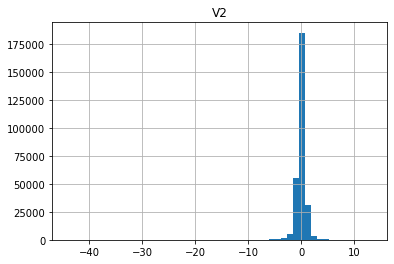

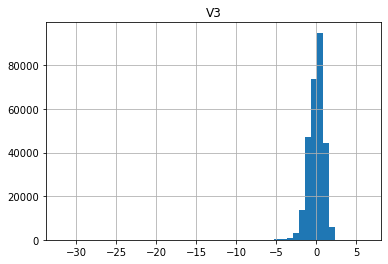

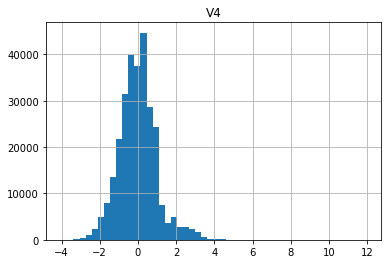

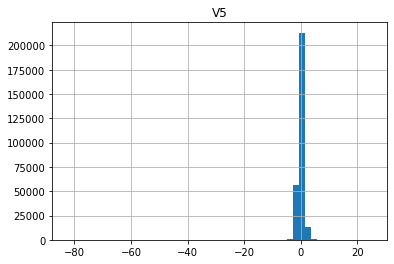

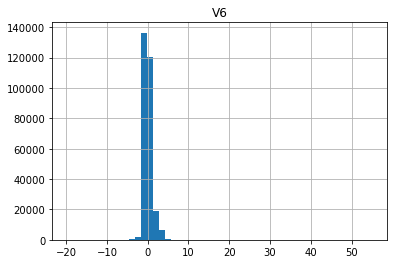

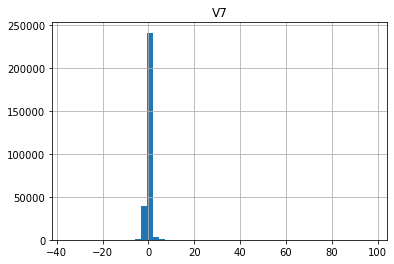

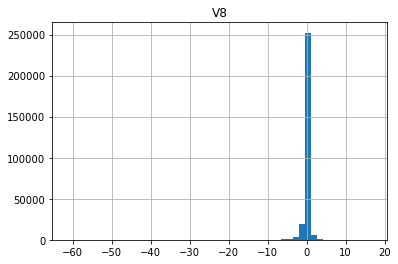

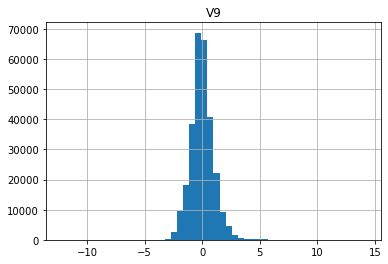

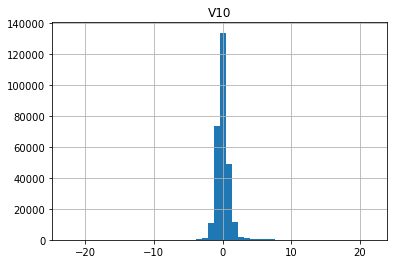

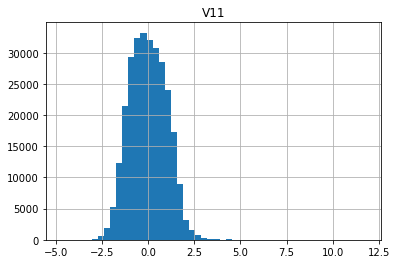

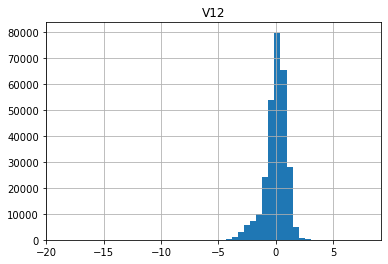

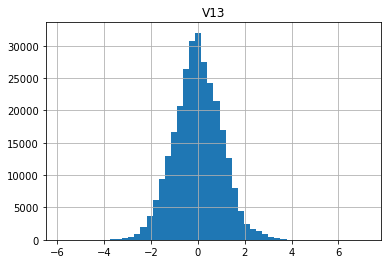

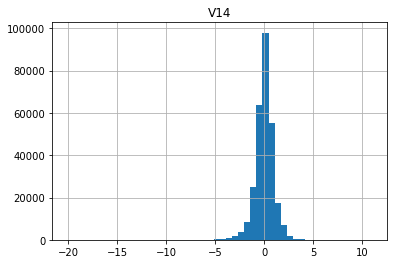

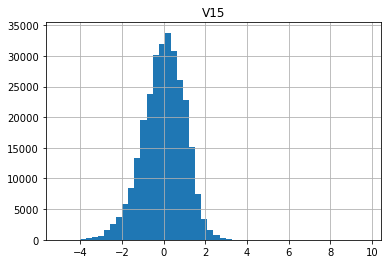

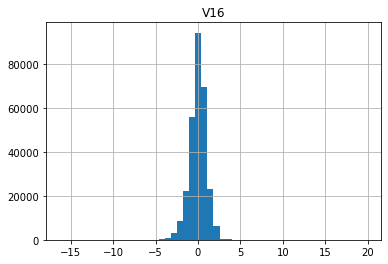

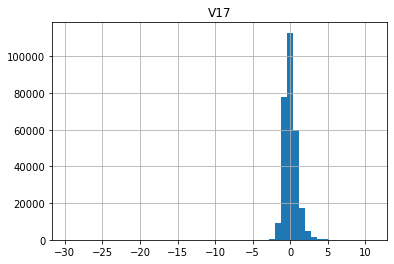

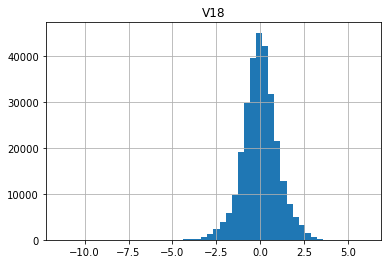

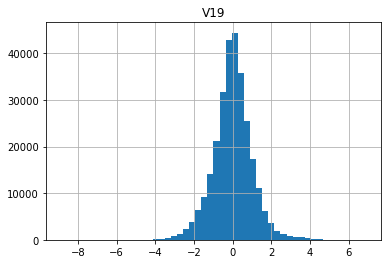

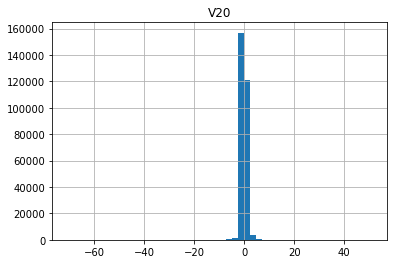

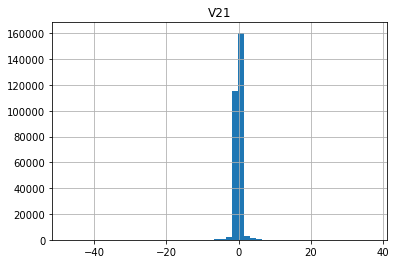

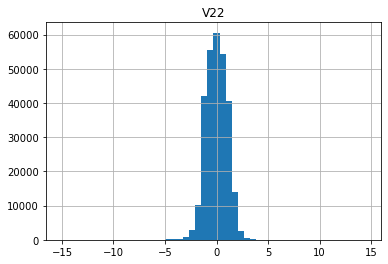

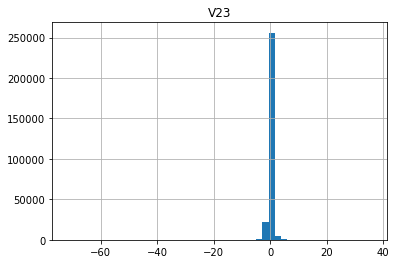

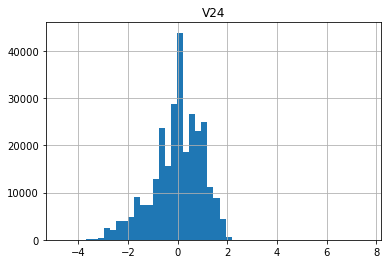

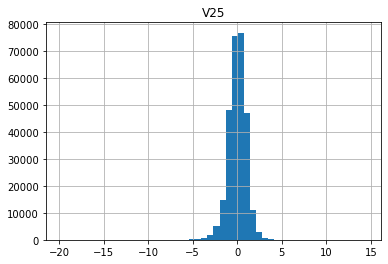

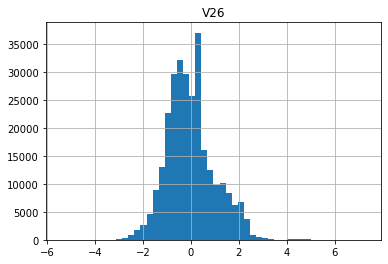

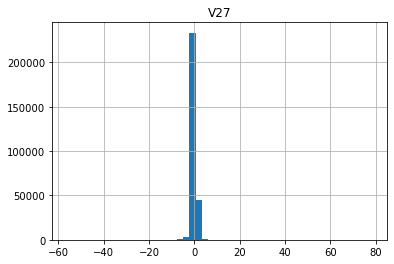

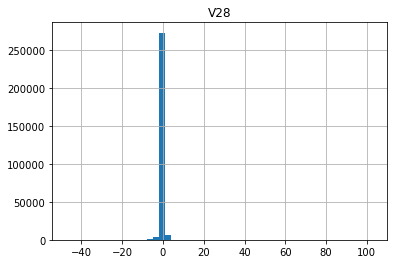

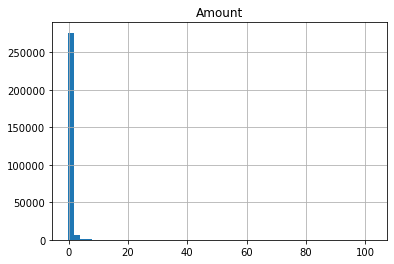

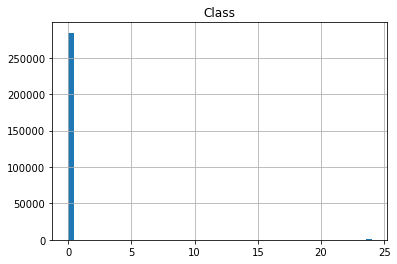

In [103]:
for col in standardDF.columns.tolist():
    plt.hist(standardDF[col], bins = 50)
    plt.title(col)
    plt.grid(True)
    plt.show()

### y Label

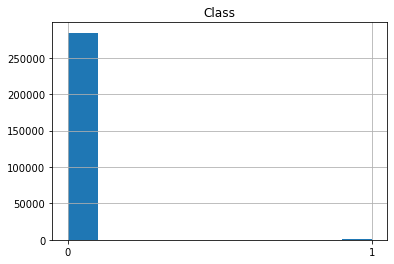

In [114]:
plt.hist(DF['Class'],
         histtype = 'bar',
        range = (0,1),
        align='mid')
plt.grid(True)
plt.title('Class')
plt.xticks([0,1])
plt.show()

In [112]:
b

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])